<a href="https://colab.research.google.com/github/kworathur/CV-Capstone/blob/main/brain_tumor_prediction_efficientnet_high_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Downloading notebook as html
# Step 1: Download .ipynb file
# Step 2: Upload .ipynb file to Files in Colab
# Step 3: Run code
# Step 4: Download .html file from Files
# Step 5: Open .html file
# Step 6: Save file as .pdf
#!jupyter nbconvert --to html /content/brain_tumor_prediction_efficientnet_high_acc.ipynb

# Import needed modules

In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print('modules loaded')

modules loaded


# Download dataset using kaggle API

In [ ]:
from google.colab import files
files.upload() # this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucasnoritomihartwig","key":"88cf2e35b096aa209fe282b8dee6e5b3"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json

# Create the directories for original and augmented data
!rm -rf ./data_original/ ./data_augmented/
!mkdir data_original

# Get the most recent changes to the dataset
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset
!yes | unzip brain-tumor-mri-dataset.zip -d data_original/


Streaming output truncated to the last 5000 lines.
  inflating: data_original/Training/glioma/Tr-gl_0712.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0713.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0714.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0715.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0716.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0717.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0718.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0719.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0720.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0721.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0722.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0723.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0724.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0725.jpg  
  inflating: data_original/Training/glioma/Tr-gl_0726.jpg  
  inflating: data_original/Training/glioma/Tr-gl_

# Image Pre-Processing and Data Augmentation

In [ ]:
ORIGINAL_DATA = "./data_original/"
AUGMENTED_DATA = "./data_augmented/"


image = cv2.imread("./data_original/Training/glioma/Tr-glTr_0000.jpg", 0)
print(f"Original Dimensions: {image.shape}")
image_resized = cv2.resize(image, (256, 256))
print(f"New Dimensions: {image_resized.shape}")

# Read the images as grayscale, then resize to 256 x 256
folds = os.listdir(ORIGINAL_DATA)
for stage in folds:
  condition_list = os.listdir(ORIGINAL_DATA +  stage)
  for condition in condition_list:
    foldpath = os.path.join(ORIGINAL_DATA, stage + '/' + condition)
    file_list = os.listdir(foldpath)
    for file in file_list:

      fpath = os.path.join(ORIGINAL_DATA, stage + '/' + condition + '/' + file)
      image = cv2.imread(fpath, 0) # read in grayscale

      image_resized = cv2.resize(image, (256, 256))
      cv2.imwrite(fpath, image_resized) # overwrite the existing image

# Create 90 degree rotation matrix
rows, cols = image_resized.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
image_rot = cv2.warpAffine(image, M, (cols, rows))


!cp -r data_original/ data_augmented/

# Augmenting and storing
folds = os.listdir(AUGMENTED_DATA)
for stage in folds:
    condition_list = os.listdir(AUGMENTED_DATA + '/' + stage)
    for condition in condition_list:
        # print(condition, stage)
        foldpath = os.path.join(AUGMENTED_DATA, stage + '/' + condition)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)

            image = cv2.imread(fpath)

            # 90 degree augmentation
            if image is None:
                print("image error")
            image_rot = cv2.warpAffine(image, M, (cols, rows))
            rot_fpath = fpath[:-4] + "_90dr.jpg"
            cv2.imwrite(rot_fpath, image_rot)

            # vertical axis flip
            image_vflip = cv2.flip(image, 0)
            vflip_fpath = fpath[:-4] + "_vflip.jpg"
            cv2.imwrite(vflip_fpath, image_vflip)

Original Dimensions: (512, 512)
New Dimensions: (256, 256)


# Read data and store it in dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
AUGMENTED = True
if AUGMENTED:
    DATA_PATH = AUGMENTED_DATA
else:
    DATA_PATH = ORIGINAL_DATA

In [ ]:
# Generate data paths with labels
# train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
train_data_dir = DATA_PATH + "/Training"
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [ ]:
train_df

,filepaths,labels
0,./data_augmented//Training/pituitary/Tr-pi_097...,pituitary
1,./data_augmented//Training/pituitary/Tr-pi_072...,pituitary
2,./data_augmented//Training/pituitary/Tr-pi_145...,pituitary
3,./data_augmented//Training/pituitary/Tr-pi_121...,pituitary
4,./data_augmented//Training/pituitary/Tr-pi_028...,pituitary
...,...,...
17131,./data_augmented//Training/notumor/Tr-no_1373_...,notumor
17132,./data_augmented//Training/notumor/Tr-no_0506_...,notumor
17133,./data_augmented//Training/notumor/Tr-no_1091_...,notumor
17134,./data_augmented//Training/notumor/Tr-no_1030.jpg,notumor


In [ ]:
# Generate data paths with labels
# test_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'
test_data_dir = DATA_PATH + "/Testing"
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)

        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
ts_df = pd.concat([Fseries, Lseries], axis= 1)

# Split dataframe into train, valid, and test

In [ ]:
# valid and test dataframe
valid_df, test_df = train_test_split(ts_df,  train_size= 0.5, shuffle= True, random_state= 123)

****Create image data generator

In [ ]:
# crobed image size
batch_size = 16
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 17136 validated image filenames belonging to 4 classes.
Found 1966 validated image filenames belonging to 4 classes.
Found 1967 validated image filenames belonging to 4 classes.


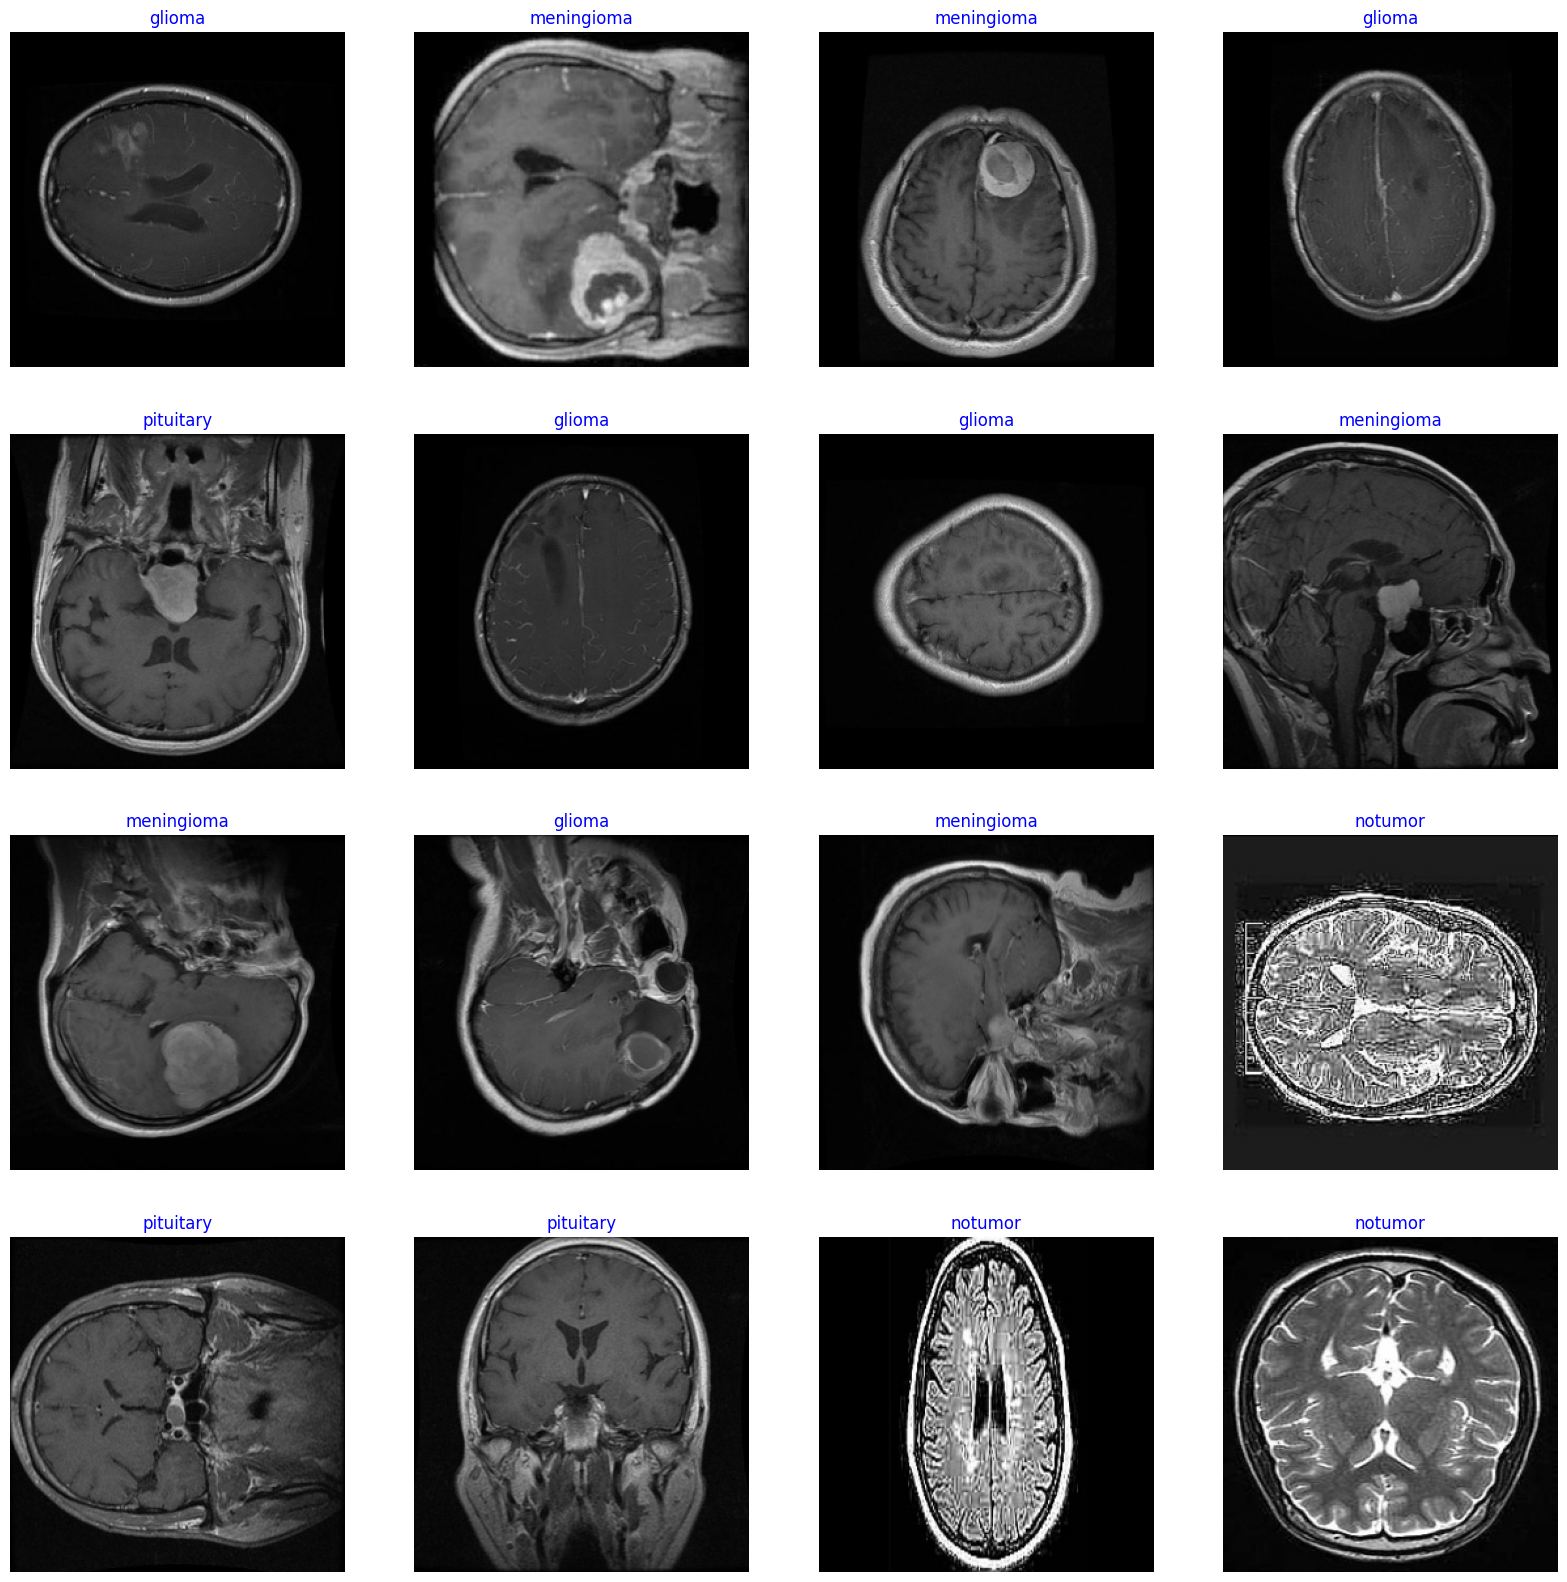

In [ ]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model Structure

**Generic Model Creation**

In [ ]:
# Create Model Structure
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])


model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11,184,179
Trainable params: 11,093,804
Non

# Train model

In [ ]:
epochs = 20   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/20
1071/1071 [==============================] - 447s 392ms/step - loss: 3.4779 - accuracy: 0.9234 - val_loss: 1.0914 - val_accuracy: 0.9888
Epoch 2/20
1071/1071 [==============================] - 419s 391ms/step - loss: 0.6174 - accuracy: 0.9733 - val_loss: 0.2940 - val_accuracy: 0.9898
Epoch 3/20
1071/1071 [==============================] - 418s 391ms/step - loss: 0.2391 - accuracy: 0.9874 - val_loss: 0.1642 - val_accuracy: 0.9939
Epoch 4/20
1071/1071 [==============================] - 418s 390ms/step - loss: 0.1623 - accuracy: 0.9926 - val_loss: 0.1520 - val_accuracy: 0.9863
Epoch 5/20
1071/1071 [==============================] - 419s 391ms/step - loss: 0.1356 - accuracy: 0.9951 - val_loss: 0.1120 - val_accuracy: 0.9969
Epoch 6/20
1071/1071 [==============================] - 418s 390ms/step - loss: 0.1187 - accuracy: 0.9961 - val_loss: 0.1104 - val_accuracy: 0.9939
Epoch 7/20
1071/1071 [==============================] - 420s 392ms/step - loss: 0.1086 - accuracy: 0.9963 - val_

**Display model performance**

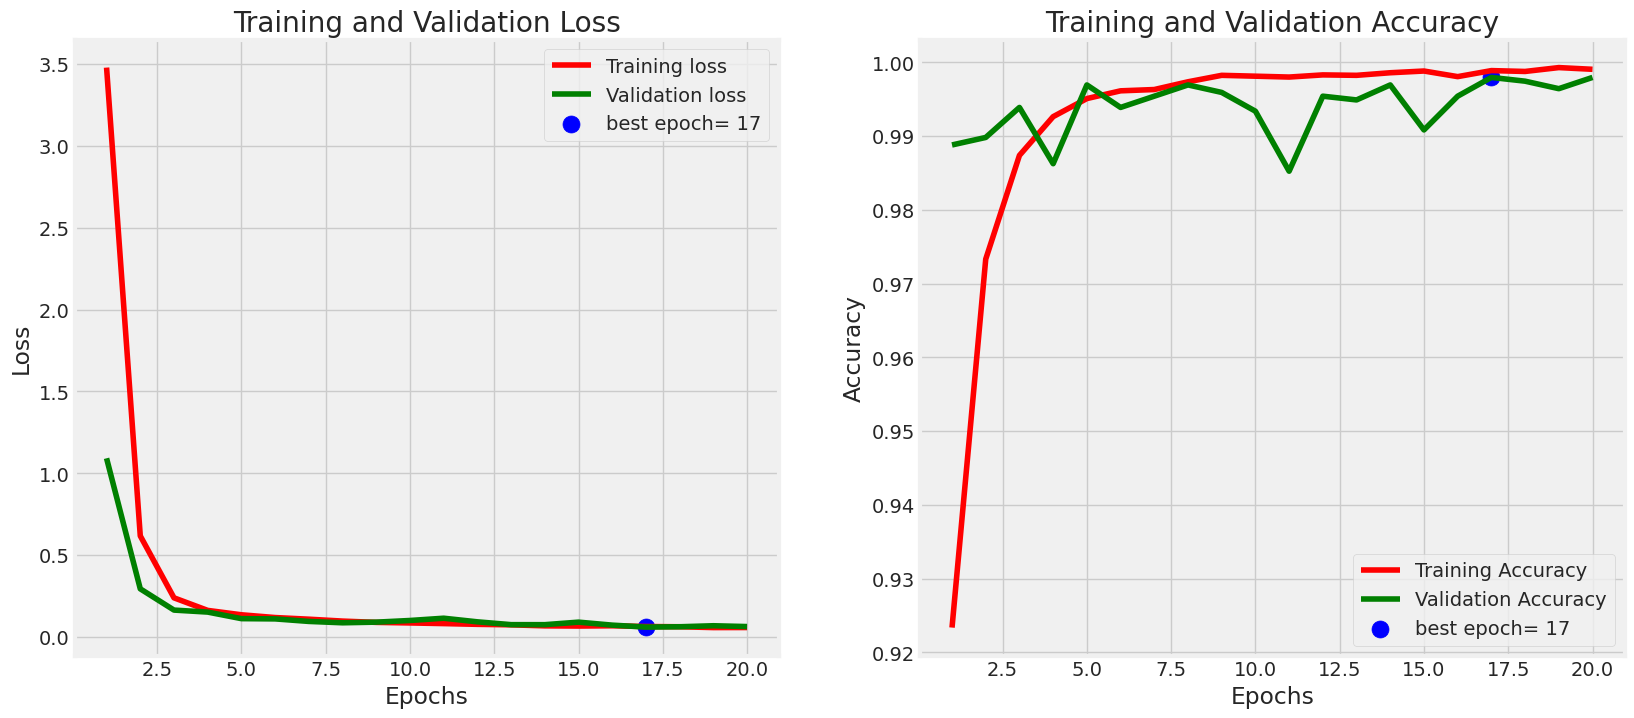

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

# Evaluate model

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

123/281 [============>.................] - ETA: 12s - loss: 0.0636 - accuracy: 0.9980

123/281 [============>.................] - ETA: 12s - loss: 0.0598 - accuracy: 0.9980

281/281 [==============================] - 10s 36ms/step - loss: 0.0598 - accuracy: 0.9980
Train Loss:  0.04894460365176201
Train Accuracy:  1.0
--------------------
Validation Loss:  0.06361463665962219
Validation Accuracy:  0.997965395450592
--------------------
Test Loss:  0.05975194647908211
Test Accuracy:  0.997966468334198


**Get Predictions**

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

NameError: ignored

**Confusion Matrics and Classification Report**

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [ ]:
print(classification_report(test_gen.classes, y_pred, target_names= classes))

In [ ]:
#Save the model
if AUGMENTED:
    model.save('Brain_Tumors_augmented_model.h5')
else:
    model.save('Brain_Tumors_original_model.h5')

**Prediction using loaded_model**

In [ ]:
if AUGMENTED:
    loaded_model = tf.keras.models.load_model('./Brain_Tumors_augmented_model.h5', compile=False)
else:
    loaded_model = tf.keras.models.load_model('./Brain_Tumors_original_model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
image_path = './' + DATA_PATH + '/Testing/pituitary/Te-piTr_0004.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((256,256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")